***
# Table of Contents

[Part 1: Exploratory Data Analysis](#PART-1:-EXPLORATORY-DATA-ANALYSIS) <br>


[Part 1 - Question 1](#Part-1---Question-1) <br> 
- [Question A - Shape of the Dataset](#Question-1---Part-A) <br>
- [Question B - Convert to Integers](#Question-1---Part-B) <br>
- [Question C - Distribution of Reviewers' Score](#Question-1---Part-C) <br>
- [Question D - Classification Distribution](#Question-1---Part-D) <br>


[Part 1 - Question 2](#Question-2) <br>


[Part 2: Data Wrangling](#PART-2---DATA-WRANGLING) <br>


[Part 2 - Question 3](#Question-3) <br>
- [Question A - Convert to Binary Column](#Question-3---Part-A) <br>
- [Question B - Convert to Numeric Columns](#Question-3---Part-B) <br>
    * [Converting the `Review_Date` Column](#Converting-the-Review_Date-column-to-numeric-columns) <br>
    * [Converting the `days_since_review` Column](#Converting-the-days_since_review-column-to-numeric-columns)<br>
    * [Dropped All Non-Numeric Columns](#Dropped-all-non-numeric-columns-(except-Positive_Review-and-Negative_Review))<br>
- [Question C - Split Data into Train and Test Sets](#Question-3---Part-C) <br>
- [Question D - Combine Text Data and Numeric Data](#Question-3---Part-D) <br>
- [Question E - `min_df` Parameter](#Question-3---Part-E) <br>

***

---

# Introduction

---

This deliverable includes the exploratory data analysis and data wrangling for a hotel review dataset, with the target column of interest being `Reviewer_Score`. The data wrangling aspect of this deliverable also includes Natural Language Processing technique to merge text data and numeric data.

---

# PART 1: EXPLORATORY DATA ANALYSIS

---

Before going into exploratory data analysis, the following libraries were imported:

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

---

## Part 1 - Question 1

---

### Question 1 - Part A

What is the shape of the dataset?

---

To find the shape of the dataset, I first loaded in the data by using `pd.read_csv` and made sure the right data was loaded by looking at the first 5 rows of the data using `.head()`:

In [2]:
reviews_df = pd.read_csv('Hotel_Reviews.csv')
reviews_df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


To find the shape of the dataset, I used `.shape`. This outputted the array dimensions showing the number of rows and columns of the dataset:

In [3]:
reviews_df.shape

(515738, 17)

**This shows that there are 515,738 rows and 17 columns in the dataset.**

To check if there are any duplicated columns, rows, and null values in the dataset, I used the `.duplicated` and `.isna` functions below:

In [4]:
reviews_df.duplicated().sum()

526

This code means that there are 527 duplicated rows within the dataset.

In [5]:
# checking for null values
reviews_df.isna().sum().sum()

6536

This code means that there are 6,536 null values in the dataset.

In [6]:
#reviews_df.T.duplicated()

There are no duplicated **columns** in the dataset.

In [7]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

**It seems that the null values are in the `lat` and `lng` columns.**

Usually, the duplicated rows and null values in the dataset would be dealt with by either dropping said rows or imputing data where there are null values, but since the questions don't indicate to do this, I moved on to the next question.

---

### Question 1 - Part B

The reviews provided are all given as decimal values. Convert them into integers from 1 to 10

---

The question stated that the target column of interest is `Reviewer_Score`, so to see if all the reviews provided are really given as decimal values, I used `.dtype` to find the data type of the column of interest.

In [8]:
reviews_df['Reviewer_Score'].dtype

dtype('float64')

This shows that indeed the column of interest is a `float64`, indicating that the values are given as decimal values. So, to convert them into integers from 1 to 10, I used `.astype()` to convert the values to integers.

In [9]:
reviews_df['Reviewer_Score'] = reviews_df['Reviewer_Score'].astype('int')

In [10]:
# To see if it worked:
reviews_df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


I used `value_counts` to group the counts of all rows by the `Reviewer_Score` column to make sure that changing the values to integers actually worked.

In [11]:
reviews_df['Reviewer_Score'].value_counts()

9     131184
10    115853
7      93241
8      88609
6      34344
5      30226
4      11553
3       6940
2       3788
Name: Reviewer_Score, dtype: int64

---

### Question 1 - Part C

The reviews are scored from 1 to 10. What do you expect the distribution of scores to look like? What is the actual distribution of reviews?

---

Based on the previous question using the `value_counts` function, it seems that the distribution might be negatively skewed. The majority of reviewer scores are on the higher end from a rating of 8 through to 10, which would result in a negatively skewed distribution.

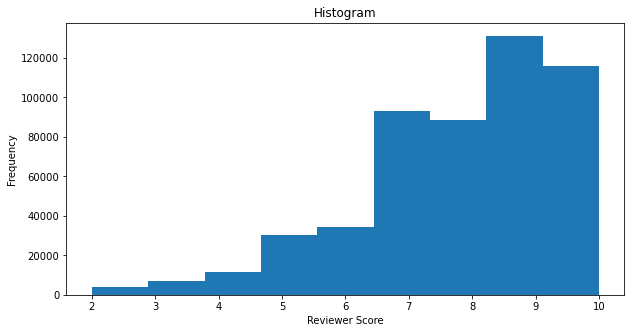

In [12]:
plt.figure(figsize=(10,5))
plt.hist(reviews_df['Reviewer_Score'], bins=9)
plt.title('Histogram')
plt.xlabel('Reviewer Score')
plt.ylabel('Frequency')
plt.show()

I plotted a histogram to observe the distribution of the `Reviewer_Score` distribution. This histogram shows that the scores are negatively skewed, with majority of the scores on the higher end between 7 through to 10. I used bins of 9 to prevent spacing between the each point and to see the distribution clearly.

---

### Question 1 - Part D

Given this will be a classification problem, what is a potential problem with this distribution?

---

With the data being negatively skewed and not normally distributed, it could be affect the performance of the model. This could also not meet the underlying assumption in hypothesis testing and modeling techniques that the samples we are working with have been drawn from a population that follows a normal distribution. When the assumption of non-skewness and normality is not met, it could result in false conclusions from the model.

So the model will be trained with a non-normality distribution, it is likely that the test data will result in a skewed conclusion since the train data was already skewed and not symmetrically distributed.

---

## Question 2

This dataset has a good mix of numeric and non-numeric columns. Which columns are numeric? Which are non-numeric? Can you turn some of the non-numeric columns to numeric?

---

Categorical columns would be columns that have `object` as the data type. If the data types of columns are integers or floats, then it would be considered numerical columns. I used the `info()` command to identify the data types of each column. Based on this result, I created a for loop to print out each column that identifies as non-numeric and numeric.

In [13]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

I can see here that there are 3 data types in the dataset: `object`, `int64`, and `float64`. The `object` data type indicates that the column is categorical, while the `int64` and `float64` columns are identified as numeric columns. I used this information to print out the numeric and non-numeric columns.

**These columns are non-numeric:**

In [14]:
categorical_cols_df = reviews_df.select_dtypes('object')

for column in categorical_cols_df:
    print(f" The {column} column is non-numeric.")

 The Hotel_Address column is non-numeric.
 The Review_Date column is non-numeric.
 The Hotel_Name column is non-numeric.
 The Reviewer_Nationality column is non-numeric.
 The Negative_Review column is non-numeric.
 The Positive_Review column is non-numeric.
 The Tags column is non-numeric.
 The days_since_review column is non-numeric.


**These columns are numeric:**

In [15]:
numeric_cols_df = reviews_df.select_dtypes(['int64', 'float64'])

for column in numeric_cols_df:
    print(f" The {column} column is numeric.")

 The Additional_Number_of_Scoring column is numeric.
 The Average_Score column is numeric.
 The Review_Total_Negative_Word_Counts column is numeric.
 The Total_Number_of_Reviews column is numeric.
 The Review_Total_Positive_Word_Counts column is numeric.
 The Total_Number_of_Reviews_Reviewer_Has_Given column is numeric.
 The Reviewer_Score column is numeric.
 The lat column is numeric.
 The lng column is numeric.


To make sure these results are accurate, I also visually inspected the data frame to ensure that the columns above are accurately identified.

In [16]:
reviews_df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


By visually inspecting the data frame, the non-numeric and numeric columns were accurately identified.

In [17]:
categorical_cols_df = reviews_df.select_dtypes('object')

for column in categorical_cols_df:
    print(categorical_cols_df[column].value_counts())
    print('*'*100)

163 Marsh Wall Docklands Tower Hamlets London E14 9SJ United Kingdom              4789
372 Strand Westminster Borough London WC2R 0JJ United Kingdom                     4256
Westminster Bridge Road Lambeth London SE1 7UT United Kingdom                     4169
Scarsdale Place Kensington Kensington and Chelsea London W8 5SY United Kingdom    3578
7 Pepys Street City of London London EC3N 4AF United Kingdom                      3212
                                                                                  ... 
21 rue Lavoisier 8th arr 75008 Paris France                                         12
2 4 Boundary Street Hackney London E2 7DD United Kingdom                            12
Via M Buonarroti 13 Fiera Milano City 20149 Milan Italy                             10
13 Rue Fran ois Ory 92120 Paris France                                              10
Johann Staud Stra e 32 16 Ottakring 1160 Vienna Austria                              8
Name: Hotel_Address, Length: 1493, dtype: i

**Non-numeric columns that could be turned into numeric columns:**

The `Review_Date` column could be turned into a numeric column by either changing it to the Year or Month that the review was given - turning the column into a numeric column.

The `Reviewer_Nationality` column could be turned into a numeric column by converting it to a binary column of "United Kingdom" with a value of 1, and "Others" with a value of 0, due to the significant difference in the number of occurrences of United Kingdom as the nationality of reviewers and the other countries.

The `days_since_review` column could be turned into a numeric column by separating the values and the "days" to only have the numeric value for the days since review, as opposed to the numeric values and the word "days" or "day".

# PART 2 - DATA WRANGLING

---

## Question 3

Build the proper dataset separation (**Optional but recommended**: The dataset is actually too big to run quickly on most laptops. Feel free to sample ~10% of the data as your dataset from this point on. Make sure all classes are included in your subsample.)

---

In [18]:
reviews_df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


To sample the original dataset: `reviews_df`, I used the `sample` function with a fraction of 0.10 to represent 10% of the dataset to separate the dataset into the variable: `sampled_reviews_df`.

In [19]:
sampled_reviews_df = reviews_df.sample(frac=0.1, random_state=1)

In [20]:
sampled_reviews_df.shape

(51574, 17)

In [21]:
sampled_reviews_df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
356054,Keizersgracht 148 Amsterdam City Center 1015 C...,85,11/29/2015,9.3,Canal House,United Kingdom,No Negative,0,491,Nothing was too much trouble The staff were a...,23,2,10,"[' Leisure trip ', ' Couple ', ' Deluxe Double...",613 day,52.376310,4.886270
395957,Park Lane Westminster Borough London W1K 7TN U...,184,2/17/2017,7.9,Grosvenor House A JW Marriott Hotel,United States of America,I had a Junior suite The bed was only a queen...,21,564,I loved there shower It felt like you were un...,17,5,10,"[' Leisure trip ', ' Couple ', ' Deluxe Suite ...",167 day,51.508202,-0.154559
468352,Ungargasse 60 03 Landstra e 1030 Vienna Austria,116,2/13/2017,8.1,Imperial Riding School Renaissance Vienna Hotel,Lithuania,staff could be less rude the pool area is hor...,12,1395,beds really comfy and the location is great a...,16,1,6,"[' Business trip ', ' Couple ', ' Double or Tw...",171 day,48.196640,16.386382
281462,Avinguda Icaria 195 Sant Mart 08005 Barcelona ...,439,3/25/2017,8.0,Hotel SB Icaria Barcelona,United Kingdom,No Negative,0,3633,Really nice hotel good facilities great staff...,24,1,9,"[' Leisure trip ', ' Family with young childre...",131 day,41.393559,2.199391
498978,Vilamari 34 36 Eixample 08015 Barcelona Spain,113,9/20/2015,8.3,Hotel Vilamar,Cyprus,No Negative,0,1127,Everything is super And room and design Very ...,12,5,10,"[' Business trip ', ' Couple ', ' Interior Fac...",683 day,41.376673,2.152448


In [22]:
reviews_df.shape

(515738, 17)

To make sure it worked, I looked at the shape of both the `sampled_reviews_df` and the original `reviews_df`. 

The new dataset has 51,574 rows and 17 columns. The original dataset has 515,738 rows and 17 columns. So, the new separated dataset is now 10% of the original dataset.

In [23]:
sampled_reviews_df['Reviewer_Score'].value_counts()

9     13227
10    11435
7      9229
8      8896
6      3544
5      3026
4      1149
3       691
2       377
Name: Reviewer_Score, dtype: int64

In [24]:
reviews_df['Reviewer_Score'].value_counts()

9     131184
10    115853
7      93241
8      88609
6      34344
5      30226
4      11553
3       6940
2       3788
Name: Reviewer_Score, dtype: int64

I used `value_counts()` of the `Reviewer_Score` column to see if the number of rows were appropriately spread out in the separated dataset. Based on the original dataset and new dataset, it seems that the data is appropriately spread out between each class of the `Reviewer_Score` column.

---

### Question 3 - Part A

Convert the `Reviewer_Score` column into a binary column in the following way. Reviews that are below 9 should be encoded as 0 ('not good') and reviews with scores 9 and 10 as 1 ('good').

---

In order to convert the `Reviewer_Score` column into a binary column, I used the `np.where` function to turn all reviews that are less than 9 to a value of "0" meaning 'not good', and all reviews with scores of 9 and 10 to a value of "1", meaning 'good'.

In [25]:
sampled_reviews_df['Reviewer_Score'] = np.where(sampled_reviews_df['Reviewer_Score'] < 9,
                                               0,
                                               1)

In [26]:
sampled_reviews_df['Reviewer_Score'].value_counts()

0    26912
1    24662
Name: Reviewer_Score, dtype: int64

In [27]:
sampled_reviews_df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
356054,Keizersgracht 148 Amsterdam City Center 1015 C...,85,11/29/2015,9.3,Canal House,United Kingdom,No Negative,0,491,Nothing was too much trouble The staff were a...,23,2,1,"[' Leisure trip ', ' Couple ', ' Deluxe Double...",613 day,52.376310,4.886270
395957,Park Lane Westminster Borough London W1K 7TN U...,184,2/17/2017,7.9,Grosvenor House A JW Marriott Hotel,United States of America,I had a Junior suite The bed was only a queen...,21,564,I loved there shower It felt like you were un...,17,5,1,"[' Leisure trip ', ' Couple ', ' Deluxe Suite ...",167 day,51.508202,-0.154559
468352,Ungargasse 60 03 Landstra e 1030 Vienna Austria,116,2/13/2017,8.1,Imperial Riding School Renaissance Vienna Hotel,Lithuania,staff could be less rude the pool area is hor...,12,1395,beds really comfy and the location is great a...,16,1,0,"[' Business trip ', ' Couple ', ' Double or Tw...",171 day,48.196640,16.386382
281462,Avinguda Icaria 195 Sant Mart 08005 Barcelona ...,439,3/25/2017,8.0,Hotel SB Icaria Barcelona,United Kingdom,No Negative,0,3633,Really nice hotel good facilities great staff...,24,1,1,"[' Leisure trip ', ' Family with young childre...",131 day,41.393559,2.199391
498978,Vilamari 34 36 Eixample 08015 Barcelona Spain,113,9/20/2015,8.3,Hotel Vilamar,Cyprus,No Negative,0,1127,Everything is super And room and design Very ...,12,5,1,"[' Business trip ', ' Couple ', ' Interior Fac...",683 day,41.376673,2.152448


---

### Question 3 - Part B

Convert the columns you identified in question 2 into numeric columns, and drop all non-numeric columns except `Positive_Review` and `Negative_Review`.

---

#### Converting the `Review_Date` column to numeric columns

---

For the `Review_Date` column, the Year and Month can be extracted and can be individual numeric columns.

To do this, I used the `pd.DatetimeIndex` to extract the year and month as numeric columns.

References:
- https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.html
- https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-separately-from-pandas-datetime-column

In [28]:
sampled_reviews_df['Review_Year'] = pd.DatetimeIndex(sampled_reviews_df['Review_Date']).year

In [29]:
sampled_reviews_df['Review_Month'] = pd.DatetimeIndex(sampled_reviews_df['Review_Date']).month

In [30]:
sampled_reviews_df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,Review_Year,Review_Month
356054,Keizersgracht 148 Amsterdam City Center 1015 C...,85,11/29/2015,9.3,Canal House,United Kingdom,No Negative,0,491,Nothing was too much trouble The staff were a...,23,2,1,"[' Leisure trip ', ' Couple ', ' Deluxe Double...",613 day,52.376310,4.886270,2015,11
395957,Park Lane Westminster Borough London W1K 7TN U...,184,2/17/2017,7.9,Grosvenor House A JW Marriott Hotel,United States of America,I had a Junior suite The bed was only a queen...,21,564,I loved there shower It felt like you were un...,17,5,1,"[' Leisure trip ', ' Couple ', ' Deluxe Suite ...",167 day,51.508202,-0.154559,2017,2
468352,Ungargasse 60 03 Landstra e 1030 Vienna Austria,116,2/13/2017,8.1,Imperial Riding School Renaissance Vienna Hotel,Lithuania,staff could be less rude the pool area is hor...,12,1395,beds really comfy and the location is great a...,16,1,0,"[' Business trip ', ' Couple ', ' Double or Tw...",171 day,48.196640,16.386382,2017,2
281462,Avinguda Icaria 195 Sant Mart 08005 Barcelona ...,439,3/25/2017,8.0,Hotel SB Icaria Barcelona,United Kingdom,No Negative,0,3633,Really nice hotel good facilities great staff...,24,1,1,"[' Leisure trip ', ' Family with young childre...",131 day,41.393559,2.199391,2017,3
498978,Vilamari 34 36 Eixample 08015 Barcelona Spain,113,9/20/2015,8.3,Hotel Vilamar,Cyprus,No Negative,0,1127,Everything is super And room and design Very ...,12,5,1,"[' Business trip ', ' Couple ', ' Interior Fac...",683 day,41.376673,2.152448,2015,9


In [31]:
sampled_reviews_df.drop('Review_Date', axis=1, inplace=True)

In [32]:
sampled_reviews_df.head()

,Hotel_Address,Additional_Number_of_Scoring,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,Review_Year,Review_Month
356054,Keizersgracht 148 Amsterdam City Center 1015 C...,85,9.3,Canal House,United Kingdom,No Negative,0,491,Nothing was too much trouble The staff were a...,23,2,1,"[' Leisure trip ', ' Couple ', ' Deluxe Double...",613 day,52.376310,4.886270,2015,11
395957,Park Lane Westminster Borough London W1K 7TN U...,184,7.9,Grosvenor House A JW Marriott Hotel,United States of America,I had a Junior suite The bed was only a queen...,21,564,I loved there shower It felt like you were un...,17,5,1,"[' Leisure trip ', ' Couple ', ' Deluxe Suite ...",167 day,51.508202,-0.154559,2017,2
468352,Ungargasse 60 03 Landstra e 1030 Vienna Austria,116,8.1,Imperial Riding School Renaissance Vienna Hotel,Lithuania,staff could be less rude the pool area is hor...,12,1395,beds really comfy and the location is great a...,16,1,0,"[' Business trip ', ' Couple ', ' Double or Tw...",171 day,48.196640,16.386382,2017,2
281462,Avinguda Icaria 195 Sant Mart 08005 Barcelona ...,439,8.0,Hotel SB Icaria Barcelona,United Kingdom,No Negative,0,3633,Really nice hotel good facilities great staff...,24,1,1,"[' Leisure trip ', ' Family with young childre...",131 day,41.393559,2.199391,2017,3
498978,Vilamari 34 36 Eixample 08015 Barcelona Spain,113,8.3,Hotel Vilamar,Cyprus,No Negative,0,1127,Everything is super And room and design Very ...,12,5,1,"[' Business trip ', ' Couple ', ' Interior Fac...",683 day,41.376673,2.152448,2015,9


---

#### Converting the `Reviewer_Nationality` column to numeric columns

---

For the `Reviewer_Nationality` column, since "United Kingdom" is significantly higher (in the number of counts) than the other nationalities, I separated the rows by signifying if the reviewers' nationality is "United Kingdom" or "Others". If the reviewers' nationality is United Kingdom, it will have a value of 1, if not, it will have a value of 0.

In [33]:
sampled_reviews_df['Reviewer_Nationality'].value_counts()

 United Kingdom                24639
 United States of America       3517
 Australia                      2221
 Ireland                        1526
 United Arab Emirates            993
                               ...  
 Guadeloupe                        1
 Gabon                             1
 Liberia                           1
 Vanuatu                           1
 Falkland Islands Malvinas         1
Name: Reviewer_Nationality, Length: 179, dtype: int64

To convert the column to numeric, I used `np.where` to convert rows with "United Kingdom" to a value of 1, and others to a value of 0.

In [34]:
sampled_reviews_df['Reviewer_Nationality'] = np.where(sampled_reviews_df["Reviewer_Nationality"] == ' United Kingdom ', 1, 0)

In [35]:
sampled_reviews_df['Reviewer_Nationality'].value_counts()

0    26935
1    24639
Name: Reviewer_Nationality, dtype: int64

In [36]:
sampled_reviews_df.head()

,Hotel_Address,Additional_Number_of_Scoring,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,Review_Year,Review_Month
356054,Keizersgracht 148 Amsterdam City Center 1015 C...,85,9.3,Canal House,1,No Negative,0,491,Nothing was too much trouble The staff were a...,23,2,1,"[' Leisure trip ', ' Couple ', ' Deluxe Double...",613 day,52.376310,4.886270,2015,11
395957,Park Lane Westminster Borough London W1K 7TN U...,184,7.9,Grosvenor House A JW Marriott Hotel,0,I had a Junior suite The bed was only a queen...,21,564,I loved there shower It felt like you were un...,17,5,1,"[' Leisure trip ', ' Couple ', ' Deluxe Suite ...",167 day,51.508202,-0.154559,2017,2
468352,Ungargasse 60 03 Landstra e 1030 Vienna Austria,116,8.1,Imperial Riding School Renaissance Vienna Hotel,0,staff could be less rude the pool area is hor...,12,1395,beds really comfy and the location is great a...,16,1,0,"[' Business trip ', ' Couple ', ' Double or Tw...",171 day,48.196640,16.386382,2017,2
281462,Avinguda Icaria 195 Sant Mart 08005 Barcelona ...,439,8.0,Hotel SB Icaria Barcelona,1,No Negative,0,3633,Really nice hotel good facilities great staff...,24,1,1,"[' Leisure trip ', ' Family with young childre...",131 day,41.393559,2.199391,2017,3
498978,Vilamari 34 36 Eixample 08015 Barcelona Spain,113,8.3,Hotel Vilamar,0,No Negative,0,1127,Everything is super And room and design Very ...,12,5,1,"[' Business trip ', ' Couple ', ' Interior Fac...",683 day,41.376673,2.152448,2015,9


---

#### Converting the `days_since_review` column to numeric columns

---

In [37]:
sampled_reviews_df['days_since_review']

356054    613 day
395957    167 day
468352    171 day
281462    131 day
498978    683 day
           ...   
205198    659 day
273289    433 day
82217     282 day
360466    27 days
229733    353 day
Name: days_since_review, Length: 51574, dtype: object

In [38]:
split_days_df = sampled_reviews_df['days_since_review'].str.split(' ', expand=True)

In [39]:
split_days_df

,0,1
356054,613,day
395957,167,day
468352,171,day
281462,131,day
498978,683,day
...,...,...
205198,659,day
273289,433,day
82217,282,day
360466,27,days


In [40]:
sampled_reviews_df['days_since_review'] = split_days_df[0]

In [41]:
sampled_reviews_df.head()

,Hotel_Address,Additional_Number_of_Scoring,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,Review_Year,Review_Month
356054,Keizersgracht 148 Amsterdam City Center 1015 C...,85,9.3,Canal House,1,No Negative,0,491,Nothing was too much trouble The staff were a...,23,2,1,"[' Leisure trip ', ' Couple ', ' Deluxe Double...",613,52.376310,4.886270,2015,11
395957,Park Lane Westminster Borough London W1K 7TN U...,184,7.9,Grosvenor House A JW Marriott Hotel,0,I had a Junior suite The bed was only a queen...,21,564,I loved there shower It felt like you were un...,17,5,1,"[' Leisure trip ', ' Couple ', ' Deluxe Suite ...",167,51.508202,-0.154559,2017,2
468352,Ungargasse 60 03 Landstra e 1030 Vienna Austria,116,8.1,Imperial Riding School Renaissance Vienna Hotel,0,staff could be less rude the pool area is hor...,12,1395,beds really comfy and the location is great a...,16,1,0,"[' Business trip ', ' Couple ', ' Double or Tw...",171,48.196640,16.386382,2017,2
281462,Avinguda Icaria 195 Sant Mart 08005 Barcelona ...,439,8.0,Hotel SB Icaria Barcelona,1,No Negative,0,3633,Really nice hotel good facilities great staff...,24,1,1,"[' Leisure trip ', ' Family with young childre...",131,41.393559,2.199391,2017,3
498978,Vilamari 34 36 Eixample 08015 Barcelona Spain,113,8.3,Hotel Vilamar,0,No Negative,0,1127,Everything is super And room and design Very ...,12,5,1,"[' Business trip ', ' Couple ', ' Interior Fac...",683,41.376673,2.152448,2015,9


In [42]:
sampled_reviews_df['days_since_review'].dtypes

dtype('O')

The column is still identified as an object, so I changed it to a numeric data type - int64.

In [43]:
sampled_reviews_df['days_since_review'] = sampled_reviews_df['days_since_review'].astype('int64')

In [44]:
sampled_reviews_df['days_since_review'].dtypes

dtype('int64')

---

#### Dropped all non-numeric columns (except `Positive_Review` and `Negative_Review`)

---

In [45]:
sampled_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51574 entries, 356054 to 229733
Data columns (total 18 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Hotel_Address                               51574 non-null  object 
 1   Additional_Number_of_Scoring                51574 non-null  int64  
 2   Average_Score                               51574 non-null  float64
 3   Hotel_Name                                  51574 non-null  object 
 4   Reviewer_Nationality                        51574 non-null  int64  
 5   Negative_Review                             51574 non-null  object 
 6   Review_Total_Negative_Word_Counts           51574 non-null  int64  
 7   Total_Number_of_Reviews                     51574 non-null  int64  
 8   Positive_Review                             51574 non-null  object 
 9   Review_Total_Positive_Word_Counts           51574 non-null  int64  
 10  Tota

The non-numeric columns that were dropped (except `Positive_Review`, and `Negative_Review`) are as follows:
- Hotel Address
- Hotel Name
- Tags

In [46]:
sampled_reviews_df.drop(['Hotel_Address', 'Hotel_Name', 'Tags'], axis=1, inplace=True)

In [47]:
sampled_reviews_df.head()

,Additional_Number_of_Scoring,Average_Score,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,days_since_review,lat,lng,Review_Year,Review_Month
356054,85,9.3,1,No Negative,0,491,Nothing was too much trouble The staff were a...,23,2,1,613,52.376310,4.886270,2015,11
395957,184,7.9,0,I had a Junior suite The bed was only a queen...,21,564,I loved there shower It felt like you were un...,17,5,1,167,51.508202,-0.154559,2017,2
468352,116,8.1,0,staff could be less rude the pool area is hor...,12,1395,beds really comfy and the location is great a...,16,1,0,171,48.196640,16.386382,2017,2
281462,439,8.0,1,No Negative,0,3633,Really nice hotel good facilities great staff...,24,1,1,131,41.393559,2.199391,2017,3
498978,113,8.3,0,No Negative,0,1127,Everything is super And room and design Very ...,12,5,1,683,41.376673,2.152448,2015,9


In [48]:
sampled_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51574 entries, 356054 to 229733
Data columns (total 15 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Additional_Number_of_Scoring                51574 non-null  int64  
 1   Average_Score                               51574 non-null  float64
 2   Reviewer_Nationality                        51574 non-null  int64  
 3   Negative_Review                             51574 non-null  object 
 4   Review_Total_Negative_Word_Counts           51574 non-null  int64  
 5   Total_Number_of_Reviews                     51574 non-null  int64  
 6   Positive_Review                             51574 non-null  object 
 7   Review_Total_Positive_Word_Counts           51574 non-null  int64  
 8   Total_Number_of_Reviews_Reviewer_Has_Given  51574 non-null  int64  
 9   Reviewer_Score                              51574 non-null  int64  
 10  days

---

### Question 3 - Part C

Split the data into train and test sets.

---

In [49]:
y = sampled_reviews_df['Reviewer_Score']
X = sampled_reviews_df.drop('Reviewer_Score', axis=1)

In [50]:
print(X.shape,y.shape)

(51574, 14) (51574,)


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [52]:
print(X_train.shape, y_train.shape)

(41259, 14) (41259,)


In [53]:
print(X_test.shape, y_test.shape)

(10315, 14) (10315,)


---

### Question 3 - Part D

Use a count vectorizer to combine `Positive_Review` and `Negative_Review` with the numeric data (notice that this is done AFTER the train/test split). 

You should vectorize each column **separately**, ending up with two sparse matrixes, and then combine the three matrixes (numeric data, positive matrix, negative matrix). You may have to adjust the `min_df` parameter.

---

To use the `CountVectorizer()` to combine the `Positive_Review` and `Negative_Review` with the numeric data, I vectorized each column separately first, resulting in two separate sparse matrix.

I imported the `CountVectorizer()` function, and instantiated it, including `stop_words` and `min_df` parameters. The `stop_words` parameter was used to remove very frequent words that do not help in understanding the text given, and the `min_df` parameter was given a value of '5', to remove words that appear less than 5 times.

Following the instantiation, I fit and transformed each column to produce the sparse matrix.

**The `Positive_Review` matrix:**

In [54]:
# Instantiate
bagofwords_positive = CountVectorizer(stop_words="english", min_df=5)

# Fit
bagofwords_positive.fit(X_train['Positive_Review'])

# Transform
positive_transformed = bagofwords_positive.transform(X_train['Positive_Review'])
positive_transformed

<41259x3565 sparse matrix of type '<class 'numpy.int64'>'
	with 340264 stored elements in Compressed Sparse Row format>

The `Positive_Review` sparse matrix has 41,259 rows and 3,565 columns.

**The `Negative_Review` matrix:**

In [55]:
# Instantiate
bagofwords_negative = CountVectorizer(stop_words="english", min_df=5)

# Fit
bagofwords_negative.fit(X_train['Negative_Review'])

# Transform
negative_transformed = bagofwords_negative.transform(X_train['Negative_Review'])
negative_transformed

<41259x4502 sparse matrix of type '<class 'numpy.int64'>'
	with 295230 stored elements in Compressed Sparse Row format>

The `Negative_Review` sparse matrix has 41,259 rows and 4,502 columns.

I then used the `get_feature_names()` function to see what the individual tokens look like for both the positive and negative reviews:

In [56]:
bagofwords_negative.get_feature_names()

['00',
 '000',
 '00am',
 '00pm',
 '01',
 '02',
 '07',
 '08',
 '09',
 '10',
 '100',
 '1000',
 '101',
 '103',
 '105',
 '10am',
 '10pm',
 '10th',
 '11',
 '110',
 '111',
 '11am',
 '11pm',
 '11th',
 '12',
 '120',
 '12am',
 '12pm',
 '13',
 '130',
 '135',
 '14',
 '140',
 '15',
 '150',
 '15mins',
 '16',
 '17',
 '170',
 '18',
 '180',
 '19',
 '1am',
 '1pm',
 '1st',
 '20',
 '200',
 '2015',
 '2016',
 '2017',
 '20min',
 '20mins',
 '21',
 '210',
 '219',
 '21st',
 '22',
 '23',
 '230',
 '24',
 '240',
 '24hr',
 '24hrs',
 '25',
 '250',
 '25th',
 '26',
 '27',
 '28',
 '29',
 '2am',
 '2nd',
 '2pm',
 '30',
 '300',
 '30am',
 '30pm',
 '30th',
 '32',
 '33',
 '34',
 '35',
 '350',
 '36',
 '37',
 '38',
 '3am',
 '3pm',
 '3rd',
 '3star',
 '40',
 '400',
 '42',
 '45',
 '45am',
 '48',
 '4am',
 '4pm',
 '4star',
 '4th',
 '50',
 '500',
 '50th',
 '54',
 '55',
 '5am',
 '5ft',
 '5pm',
 '5star',
 '5th',
 '60',
 '600',
 '65',
 '6am',
 '6ft',
 '6pm',
 '6th',
 '70',
 '700',
 '75',
 '7am',
 '7pm',
 '7th',
 '80',
 '800',
 '8am',


In [57]:
len(bagofwords_negative.get_feature_names())

4502

In [58]:
bagofwords_positive.get_feature_names()

['00',
 '02',
 '10',
 '100',
 '100m',
 '10am',
 '10min',
 '10mins',
 '10minutes',
 '10th',
 '11',
 '11am',
 '11pm',
 '11th',
 '12',
 '12th',
 '13',
 '14',
 '14th',
 '15',
 '150',
 '15min',
 '15mins',
 '15th',
 '16',
 '16th',
 '17',
 '17th',
 '18',
 '18th',
 '19',
 '19th',
 '1am',
 '1st',
 '20',
 '200',
 '200m',
 '2015',
 '2016',
 '2017',
 '20mins',
 '20th',
 '21',
 '21st',
 '22',
 '23',
 '24',
 '24h',
 '24hr',
 '25',
 '250',
 '26',
 '27',
 '2min',
 '2mins',
 '2nd',
 '2pm',
 '30',
 '300',
 '30min',
 '30pm',
 '30th',
 '35',
 '360',
 '3am',
 '3min',
 '3pm',
 '3rd',
 '40',
 '400',
 '40th',
 '45',
 '48',
 '4am',
 '4pm',
 '4th',
 '50',
 '500',
 '50m',
 '50th',
 '55',
 '5min',
 '5mins',
 '5star',
 '5th',
 '60',
 '60th',
 '6pm',
 '6th',
 '70',
 '7th',
 '8th',
 '90',
 '99',
 '9am',
 '9th',
 'a1',
 'abbey',
 'ability',
 'able',
 'abroad',
 'absolute',
 'absolutely',
 'absolutley',
 'abundance',
 'abundant',
 'ac',
 'acceptable',
 'acces',
 'access',
 'accessibility',
 'accessible',
 'accessing',

In [59]:
len(bagofwords_positive.get_feature_names())

3565

I then converted both sparse matrices (positive reviews and negative reviews) into numpy arrays.

In [60]:
negative_transformed.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [61]:
negative_transformed.shape

(41259, 4502)

In [62]:
positive_transformed.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [63]:
positive_transformed.shape

(41259, 3565)

Now that both review have been converted into arrays, I extracted the information and put it in a data frame, and matched the indexes to what is in the `X_train` data frame, before combining all the information together:

In [64]:
negative_df = pd.DataFrame(columns=bagofwords_negative.get_feature_names(),
                          data=negative_transformed.toarray(), 
                          index=X_train.index)
display(negative_df)

,00,000,00am,00pm,01,02,07,08,09,10,...,yelling,yellow,yes,yo,yoghurt,yogurt,young,younger,zero,zone
220673,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
109027,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
408236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
365335,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
173528,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36561,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
123259,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
369090,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
450226,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
positive_df = pd.DataFrame(columns=bagofwords_positive.get_feature_names(),
                          data=positive_transformed.toarray(), 
                          index=X_train.index)
display(positive_df)

,00,02,10,100,100m,10am,10min,10mins,10minutes,10th,...,yogurt,young,younger,youtube,yummy,zero,ziggo,zone,zoo,zuid
220673,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
109027,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
408236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
365335,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
173528,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36561,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
123259,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
369090,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
450226,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


I combined all three data frames (numeric data, positive reviews matrix, and negative reviews matrix) using the `pd.concat` function.

In [66]:
X_train_combined_df = pd.concat([X_train, positive_df, negative_df], axis=1)

In [67]:
X_train_combined_df.shape

(41259, 8081)

In [68]:
X_train_combined_df.head()

,Additional_Number_of_Scoring,Average_Score,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,...,yelling,yellow,yes,yo,yoghurt,yogurt,young,younger,zero,zone
220673,133,8.8,0,No Negative,0,1327,So near to shopping,5,40,469,...,0,0,0,0,0,0,0,0,0,0
109027,930,8.9,1,Sadly We were not allowed in the G and Tea ba...,20,2836,Location staff,3,1,100,...,0,0,0,0,0,0,0,0,0,0
408236,301,8.4,0,Beds were not too comfortable needed new matt...,9,3445,Size of room was great,6,1,584,...,0,0,0,0,0,0,0,0,0,0
365335,365,8.3,1,No Negative,0,1463,A relaxing weekend away with my boyfriend in ...,13,1,603,...,0,0,0,0,0,0,0,0,0,0
173528,1444,7.8,1,Room was a long walk from the elevator,10,5726,No Positive,0,5,406,...,0,0,0,0,0,0,0,0,0,0


Now that the training data has been combined, I removed the `Negative_Review` column, and `Positive_Review` column, to make the entire dataset numeric.

In [69]:
X_train_combined_df.drop(['Negative_Review', 'Positive_Review'], axis=1, inplace=True)

In [70]:
X_train_combined_df.shape

(41259, 8079)

In [71]:
X_train_combined_df.head()

,Additional_Number_of_Scoring,Average_Score,Reviewer_Nationality,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,...,yelling,yellow,yes,yo,yoghurt,yogurt,young,younger,zero,zone
220673,133,8.8,0,0,1327,5,40,469,48.871415,2.323968,...,0,0,0,0,0,0,0,0,0,0
109027,930,8.9,1,20,2836,3,1,100,51.507271,-0.021121,...,0,0,0,0,0,0,0,0,0,0
408236,301,8.4,0,9,3445,6,1,584,45.460855,9.188618,...,0,0,0,0,0,0,0,0,0,0
365335,365,8.3,1,0,1463,13,1,603,51.511945,-0.179939,...,0,0,0,0,0,0,0,0,0,0
173528,1444,7.8,1,10,5726,0,5,406,51.493508,-0.183435,...,0,0,0,0,0,0,0,0,0,0


**Transforming the test set:**

The test data has to be in the same format as the training data - they both have to have the same features. I used the bag-of-words vectorizer fitted to the train data to transform the test data as well.

In [72]:
X_test_transformed_positive = bagofwords_positive.transform(X_test['Positive_Review'])
X_test_transformed_negative = bagofwords_negative.transform(X_test['Negative_Review'])

In [73]:
X_test_transformed_positive

<10315x3565 sparse matrix of type '<class 'numpy.int64'>'
	with 83185 stored elements in Compressed Sparse Row format>

The transformed test data for **positive** reviews has 10,315 rows and 3,565 columns.

In [74]:
X_test_transformed_negative

<10315x4502 sparse matrix of type '<class 'numpy.int64'>'
	with 73857 stored elements in Compressed Sparse Row format>

The transformed test data for **negative** reviews has 10,315 rows and 4,502 columns.

In [75]:
X_test_transformed_positive.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [76]:
X_test_transformed_negative.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

---

### Question 3 - Part E

What does the `min_df` parameter do?

---

The `min_df` parameter removes word terms that appear infrequently based on the number set for the parameter. 


For example, if the `min_df` parameter is set to 5, terms that appear in less than 5 documents (each review), will be ignored. If no value is given for the parameter, then it will be set to 1, meaning that terms will be ignored if it appears in less than 1 document - resulting to terms not being ignored at all.